## People Counting Algorithm

In [1]:
# %config IPCompleter.greedy=True

In [2]:
from packages.people_counting import PeopleCounter

from packages.object_tracking import ObjectTracker
from packages.utils.visualization import display_image, add_detected_boxes_to_image_array, DynamicPlot
from packages.utils.images import read_image
from packages.object_detection import ObjectDetector
from packages.utils.videos import VideoSource

from ipywidgets import interact
import time

In [3]:
DETECTOR = 'ssd_inception_v2'
VIDEO_PATH = './videos/example_01.mp4'

In [4]:
peopleCounter = PeopleCounter()

[INFO] loading model...
Done.


In [5]:
vs = VideoSource(VIDEO_PATH)

In [6]:
detector = ObjectDetector(DETECTOR)

[INFO] loading model...
Done.


In [7]:
object_tracker = ObjectTracker()

<IPython.core.display.Javascript object>


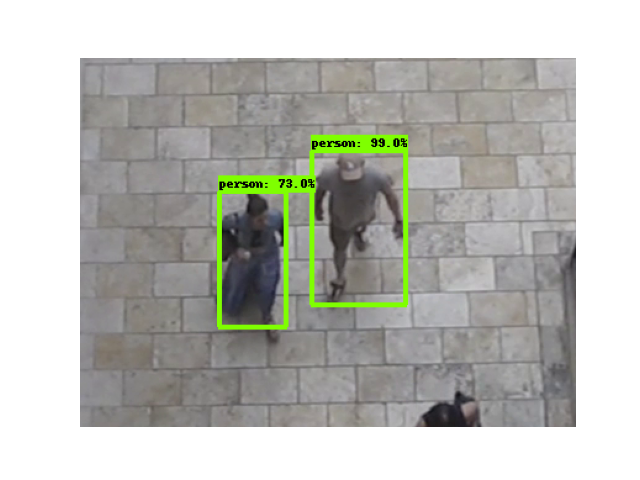

interactive(children=(IntSlider(value=0, description='x', max=1282), Output()), _dom_classes=('widget-interact…

<function __main__.update_image(x=0)>

In [8]:
%matplotlib notebook
plot = DynamicPlot()

def update_image(x = 0):
    frame = vs.get_frame(x)
    output_dict = detector.detect_people(frame)
    add_detected_boxes_to_image_array(frame, output_dict)
    plot.update_image(frame)

interact(update_image, x=(0, vs.get_total_frames() - 1, 1))

running display


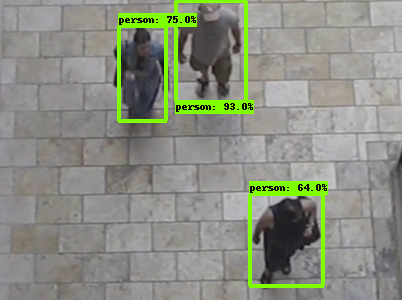

In [9]:
frame_1 = vs.get_frame(395)
frame_1_copy = frame_1.copy()
initial_detections = detector.detect_people(frame_1_copy)
add_detected_boxes_to_image_array(frame_1_copy, initial_detections)
display_image(frame_1_copy)

In [10]:
object_tracker.start_tracking(initial_detections, frame_1)

In [11]:
object_tracker.trackers

In [12]:
# next frames:
for ind in range(30):
    start_time = time.time()
    next_frame = vs.get_frame(396 + ind)
    start_time = time.time()
    object_tracker.update(next_frame)
    end_time = time.time()
    print("tracking frame {} took {:.2} seconds.".format(ind + 396, end_time - start_time))

tracking frame 396 took 0.036 seconds. correlation: 17.634136545332577
tracking frame 397 took 0.039 seconds. correlation: 12.675795139257646
tracking frame 398 took 0.039 seconds. correlation: 11.232379624750818
tracking frame 399 took 0.038 seconds. correlation: 11.179804348501916
tracking frame 400 took 0.038 seconds. correlation: 10.969233736837323
tracking frame 401 took 0.038 seconds. correlation: 8.757117920854805
tracking frame 402 took 0.038 seconds. correlation: 8.764284459337949
tracking frame 403 took 0.035 seconds. correlation: 8.53899389468249
tracking frame 404 took 0.036 seconds. correlation: 8.616980111577027
tracking frame 405 took 0.042 seconds. correlation: 7.226016582862582
tracking frame 406 took 0.038 seconds. correlation: 7.597614452652283
tracking frame 407 took 0.038 seconds. correlation: 7.191044440928487
tracking frame 408 took 0.037 seconds. correlation: 7.654150693189026
tracking frame 409 took 0.038 seconds. correlation: 6.515384211086078
tracking frame 4

running display


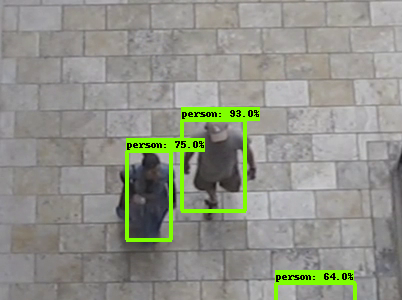

In [13]:
frame_404_copy = next_frame.copy()
add_detected_boxes_to_image_array(frame_404_copy, object_tracker.targets)
display_image(frame_404_copy)

In [14]:
detections_404 = detector.detect_people(next_frame)

running display


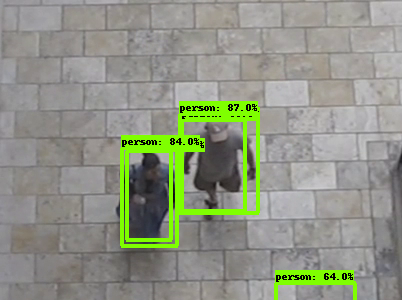

In [15]:
frame_404_second_copy = frame_404_copy.copy()
add_detected_boxes_to_image_array(frame_404_second_copy, detections_404)
display_image(frame_404_second_copy)